In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [11]:
df=pd.read_csv(r'C:\Users\Shivani Yadav\Downloads\archive (1)\fraudTrain.csv')

In [12]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [13]:
df.shape

(1296675, 23)

In [14]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [15]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [16]:
df.drop(['trans_date_trans_time','merchant','category','first','last','gender','street','city','state','job','dob','trans_num'],axis=1,inplace=True)

In [17]:
df

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,30263540414123,15.56,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765,0
1296671,1296671,6011149206456997,51.70,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528,0
1296672,1296672,3514865930894695,105.93,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529,0
1296673,1296673,2720012583106919,74.90,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160,0


In [18]:
df.dtypes

Unnamed: 0      int64
cc_num          int64
amt           float64
zip             int64
lat           float64
long          float64
city_pop        int64
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object

In [19]:
df.isnull()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1296670,False,False,False,False,False,False,False,False,False,False,False
1296671,False,False,False,False,False,False,False,False,False,False,False
1296672,False,False,False,False,False,False,False,False,False,False,False
1296673,False,False,False,False,False,False,False,False,False,False,False


In [20]:
df.isnull().sum()

Unnamed: 0    0
cc_num        0
amt           0
zip           0
lat           0
long          0
city_pop      0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [21]:
is_fraud_name={0:'Not_fraud', 1:'Fraud'}
print(df.is_fraud.value_counts().rename(index=is_fraud_name))

is_fraud
Not_fraud    1289169
Fraud           7506
Name: count, dtype: int64


In [14]:
y=df['is_fraud']
x=df.loc[:,df.columns !='is_fraud']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


In [15]:
x

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
0,0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315
1,1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462
2,2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481
3,3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071
4,4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,30263540414123,15.56,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765
1296671,1296671,6011149206456997,51.70,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528
1296672,1296672,3514865930894695,105.93,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529
1296673,1296673,2720012583106919,74.90,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160


In [16]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1296675, dtype: int64

In [17]:
x_train

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
509059,509059,639023984367,51.71,13647,44.6087,-74.9732,69,1344482007,44.785928,-74.659301
395295,395295,373905417449658,13.78,76665,31.9290,-97.6443,2526,1340999808,31.414028,-98.152203
536531,536531,3553629419254918,961.26,98238,48.3400,-122.3456,85,1345300940,49.118546,-122.622065
271001,271001,371034293500716,43.68,96135,40.0235,-120.7986,128,1336944466,39.528098,-121.059990
532788,532788,4335531783520911,33.08,65066,38.3511,-91.4867,6703,1345212941,39.213785,-92.188153
...,...,...,...,...,...,...,...,...,...,...
125527,125527,30044330818990,19.70,33967,26.4722,-81.8122,224256,1331413575,26.986105,-82.688123
150047,150047,3587044315915002,123.45,38039,35.0659,-89.1534,1804,1332392799,35.018147,-88.395919
1151888,1151888,4169759661243568,64.98,17041,40.2236,-76.5380,213,1366913512,40.191038,-77.350918
547306,547306,30118423745458,33.65,7747,40.4109,-74.2380,30770,1345647578,40.081094,-73.434345


In [18]:
y_train

509059     0
395295     0
536531     0
271001     0
532788     0
          ..
125527     0
150047     0
1151888    0
547306     0
33493      0
Name: is_fraud, Length: 1037340, dtype: int64

In [19]:
x_test

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
1161537,1161537,4769426683924058915,6.64,17058,40.5553,-77.4001,1909,1367207861,41.405953,-77.922023
192923,192923,3566094707272327,68.85,91321,34.3795,-118.5230,34882,1333970577,33.510847,-118.731586
1086283,1086283,30510856607165,122.90,48154,42.3958,-83.3772,96942,1364405691,42.264618,-82.498996
1069482,1069482,4247921790666,92.78,43160,39.5370,-83.4550,22305,1363759958,38.737145,-82.588436
689806,689806,377895991033232,61.51,6441,41.4682,-72.5751,5438,1350797101,42.026482,-72.653926
...,...,...,...,...,...,...,...,...,...,...
279879,279879,4755696071492,17.38,75048,32.9643,-96.6012,20328,1337359130,33.795497,-95.990832
571892,571892,630424987505,70.41,26292,39.1505,-79.5030,836,1346413655,39.189399,-78.933630
714013,714013,4713464490314802,38.34,57641,45.7084,-101.1546,295,1351765769,46.281527,-100.366952
1226658,1226658,6011366578560244,90.77,17051,40.5046,-77.7186,4653,1369607653,40.134332,-76.900407


In [20]:
y_test

1161537    0
192923     0
1086283    0
1069482    0
689806     0
          ..
279879     0
571892     0
714013     0
1226658    0
691698     0
Name: is_fraud, Length: 259335, dtype: int64

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
df=LogisticRegression()
df.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred=df.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
accuracy_score(y_test,y_pred)*100

99.42121194593865

In [25]:
precision_score(y_test,y_pred)*100

0.0

In [26]:
confusion_matrix(y_test,y_pred)

array([[257834,      0],
       [  1501,      0]], dtype=int64)

<Axes: >

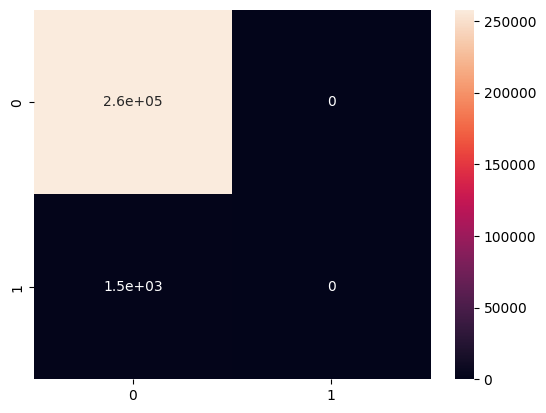

In [27]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [28]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc_dtree=round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy of DecisionTreeClassifier',acc_dtree )

Accuracy of DecisionTreeClassifier 99.33


In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_hat=dtc.predict(x_test)
y_hat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
accuracy_score(y_test,y_hat)

0.9932712514701062

In [31]:
confusion_matrix(y_test,y_hat)

array([[256915,    919],
       [   826,    675]], dtype=int64)

<Axes: >

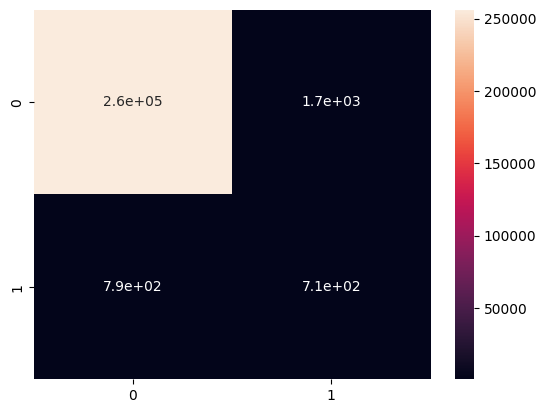

In [37]:
sns.heatmap(confusion_matrix(y_test,y_hat),annot=True)

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
y_hat=lda.predict(x_test)
y_hat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
accuracy_score(y_test,y_hat)

0.9904370794532169

In [34]:
confusion_matrix(y_test,y_hat)

array([[256148,   1686],
       [   794,    707]], dtype=int64)

In [35]:
accuracy_score(y_hat,y_test)

0.9904370794532169

In [36]:
confusion_matrix(y_hat,y_test)

array([[256148,    794],
       [  1686,    707]], dtype=int64)